In [1]:
from helper import *
from math import log,pi

inpu_data1 = read_input('LS_Group05/Class1.txt')
inpu_data2 = read_input('LS_Group05/Class2.txt')
inpu_data3 = read_input('LS_Group05/Class3.txt')

train_data1,test_data1 = part_data(inpu_data1)
train_data2,test_data2 = part_data(inpu_data2)
train_data3,test_data3 = part_data(inpu_data3)


mean1,variance1 = get_stats(train_data1)
mean2,variance2 = get_stats(train_data2)
mean3,variance3 = get_stats(train_data3)

print mean1, variance1
print mean2, variance2
print mean3, variance3

[15.992071733333326, 0.033128900266666636] [10.03360031994788, 2.5257254385989087]
[5.980418666666664, -11.956850133333319] [3.022530206958251, 4.578158819566966]
[-1.0859102919999997, 1.610371856] [1.5672517188657036, 9.508855846537575]


In [2]:
print min(test_data1),max(test_data1)
print min(test_data2),max(test_data2)
print min(test_data3),max(test_data3)
# For part a
def cov_task1():
    cov= matrix_add([variance1],[variance2])
    cov= matrix_add(cov,[variance3])
#     print cov
    cov=cov_diagonal(cov)
#     print cov
    cov=cov_div(cov,3.0)
#     print cov
    X=cov
    cov=[[X[0][0] if(i==j) else 0 for j in range(0,len(X[0]))] for i in range(0,len(X[0]))]
#     print cov
    return cov

print cov_task1()

[8.7017, 3.3401] [22.846, -0.97145]
[1.7815, -17.459] [12.08, -8.2867]
[-5.2191, -1.4703] [2.1935, 5.3604]
[[4.874460748590612, 0], [0, 4.874460748590612]]


In [3]:
# for part b
def cov_task2():
    cov1 = cov_matrix(train_data1,mean1)
    cov2 = cov_matrix(train_data2,mean2)
    cov3 = cov_matrix(train_data3,mean3)

#     print cov1
#     print cov2
#     print cov3
    cov= matrix_add(cov1,cov2)
    cov= matrix_add(cov,cov3)
#     print cov
    cov=cov_diagonal(cov)
#     print cov
    cov=cov_div(cov,3.0)
#     print cov
#     cov_inv = inverse_matrix(cov)
#     print cov_inv
    return cov

print cov_task2()

[[4.874460748590527, 0.0], [0.0, 5.5375800349010476]]


In [4]:
# Test test samples of a class against model of the same class
def task3(inpu_data):
    train_data,test_data = part_data(inpu_data)
    mean,variance = get_stats(train_data)
    print mean, variance
    ans=[]
    cov = cov_matrix(train_data,mean)
    cov_inv = inverse_matrix(cov)    
    for i in range(0,len(test_data)):
        a = get_difference_vector(test_data[i],mean)
        b = transpose(a)
        result = matrix_multiply(a,cov_inv)
        result = matrix_multiply(result,b)
        result = result[0][0]
        t1 = -1.0*result/2.0
#         t2 = -log(2*pi)
        t3 = log(get_determinant(cov))/2.0
        t4 = log(1/3.0)
        ans.append(t1+t2+t3+t4)
#         print t1+t2+t3+t4
    return ans

In [5]:
def t1(a,cov_inv):
    b = transpose(a)
    result = matrix_multiply(a,cov_inv)
    result = matrix_multiply(result,b)
    result = result[0][0]
    t1 = -1.0*result/2.0
    return t1

def g_c1(data):
    ans=[]
    cov = cov_matrix(train_data1,mean1)
    cov_inv = inverse_matrix(cov)
    #   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(1/3.0)
    
    for i in range(0,len(data)):    
        a = get_difference_vector(data[i],mean1)
        ans.append(t1(a,cov_inv)+t3+t4)
    return ans

def g_c2(data):
    ans=[]
    cov = cov_matrix(train_data2,mean2)
    cov_inv = inverse_matrix(cov)
    #   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(1/3.0)
    
    for i in range(0,len(data)):
        a = get_difference_vector(data[i],mean2)
        ans.append(t1(a,cov_inv)+t3+t4)
    return ans

def g_c3(data):
    ans=[]
    cov = cov_matrix(train_data3,mean3)
    cov_inv = inverse_matrix(cov)
    #   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(1/3.0)
    
    for i in range(0,len(data)):
        a = get_difference_vector(data[i],mean3)
        ans.append(t1(a,cov_inv)+t3+t4)
    return ans

In [6]:
# Change test_data_name to test_data1, test_data2 or test_data3 to apply test samples of C1, C2 or C3 on
# models of all 3 classes.

test_data=test_data1+test_data2+test_data3

test_data_name = test_data
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
            temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
    return ans

print db()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

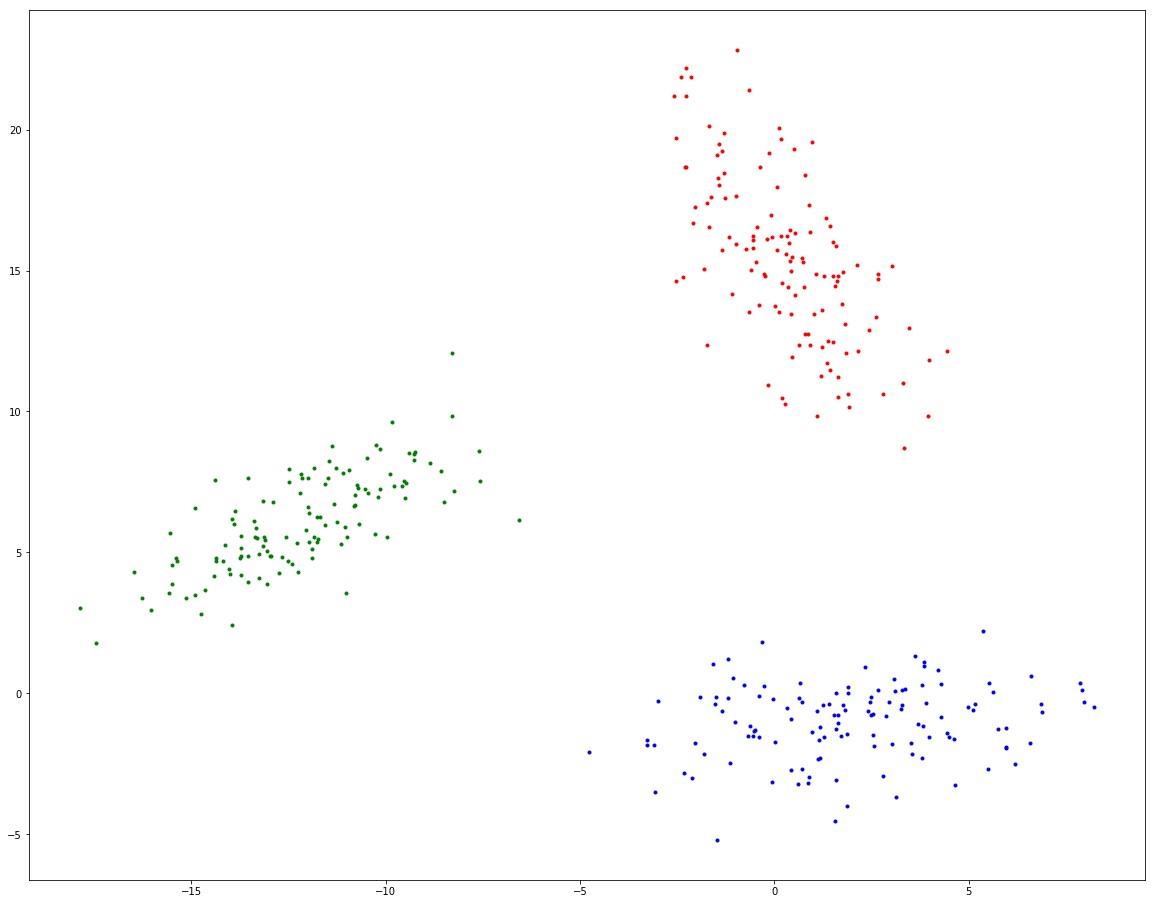

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 16]
# X=[1,2,3]
# Y=[1,2,3]
c={}
c[1]='r'
c[2]='g'
c[3]='b'
# X=[test_data[i][0] for i in range(0,len(test_data)) ]
# Y=[test_data[i][1] for i in range(0,len(test_data)) ]
# plt.plot(Y,X,'.')

X=[]
Y=[]
for i in range(0,4):
    vv=[]
    v=[]
    X.append(v)
    Y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
            temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        X[val].append(test_data[i][0])
        Y[val].append(test_data[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
# print Y[1]
# print X[1]
plt.plot(Y[1],X[1],c[1],marker='.',linestyle='None')
plt.plot(Y[2],X[2],c[2],marker='.',linestyle='None')
plt.plot(Y[3],X[3],c[3],marker='.',linestyle='None')
# X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
# Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# # print Y
# plt.plot(Y,X,'.')
# X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
# Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
# plt.plot(Y,X,'.','r')
# X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
# Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
# plt.plot(Y,X,'.','g')
plt.rcParams['figure.figsize'] = [20, 12]

In [35]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)
xi=np.linspace(-20,32,400)
yi=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
            temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()

160000 160000
160000


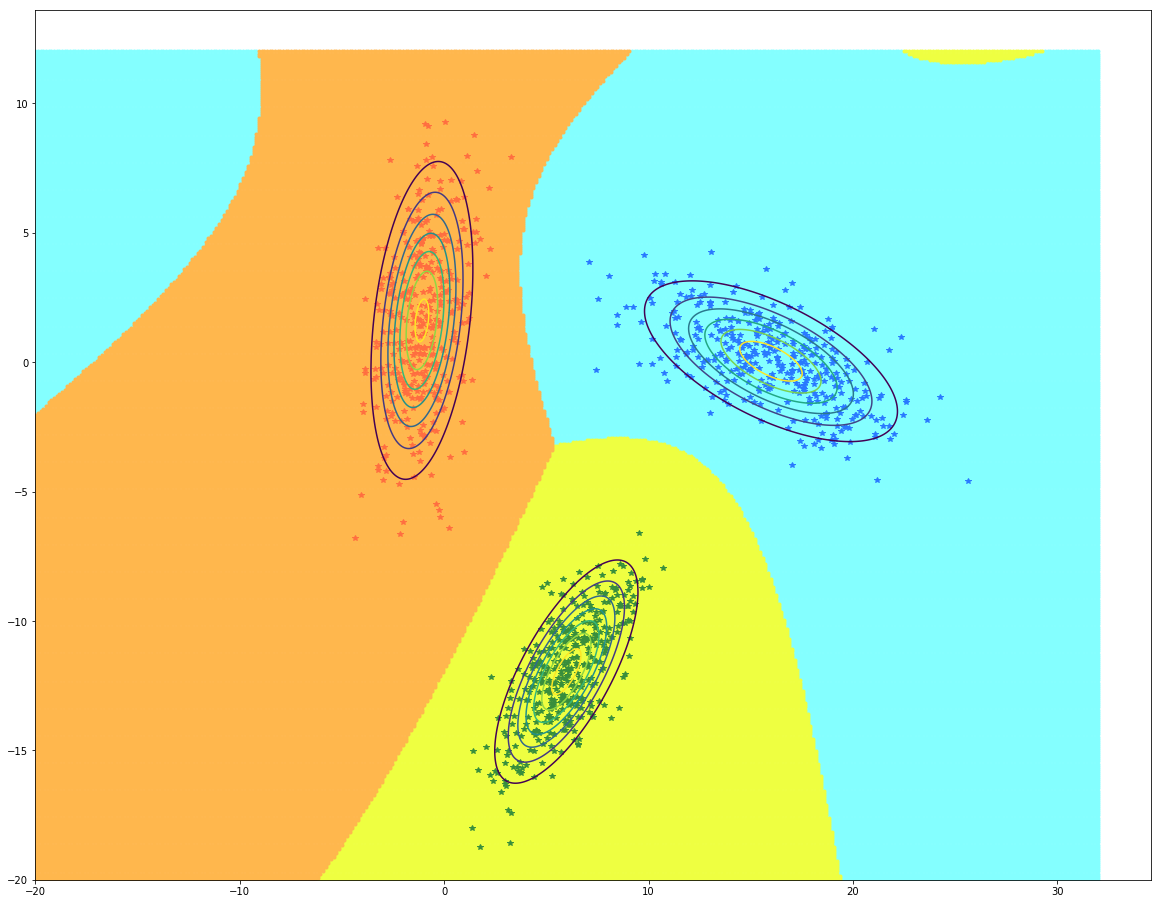

In [75]:
c={}
c[1]='#84FFFF'
c[2]='#EEFF41'
c[3]='#FFB74D'

c2={}
c2[1]='#2979FF'
c2[2]='#388E3C'
c2[3]='#FF6E40'

import matplotlib.mlab as mlab 

plt.rcParams['figure.figsize'] = [20, 16]
plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')
"""
X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')
X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')
X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
plt.plot(X,Y,c=c2[3],marker='.',linestyle='None')
"""
X=[train_data1[i][0] for i in range(0,len(train_data1)) ]
Y=[train_data1[i][1] for i in range(0,len(train_data1)) ]
plt.plot(X,Y,c=c2[1],marker='*',linestyle='None')
X=[train_data2[i][0] for i in range(0,len(train_data2)) ]
Y=[train_data2[i][1] for i in range(0,len(train_data2)) ]
plt.plot(X,Y,c=c2[2],marker='*',linestyle='None')
X=[train_data3[i][0] for i in range(0,len(train_data3)) ]
Y=[train_data3[i][1] for i in range(0,len(train_data3)) ]
plt.plot(X,Y,c=c2[3],marker='*',linestyle='None')

delta = 0.025
xu = np.arange(-20, 32, delta)
yu = np.arange(-20, 12, delta)
XI, YI = np.meshgrid(xu, yu)
cov1 = cov_matrix(train_data1,mean1)
sigmax=pow(cov1[0][0],0.5)
sigmay=pow(cov1[1][1],0.5)
mux=mean1[0]
muy=mean1[1]
sigmaxy = cov1[0][1]
Z1 = mlab.bivariate_normal(XI, YI, sigmax, sigmay, mux, muy,sigmaxy)
plt.contour(XI, YI, Z1,zorder=10,colors="black")

cov2 = cov_matrix(train_data2,mean2)
sigmax=pow(cov2[0][0],0.5)
sigmay=pow(cov2[1][1],0.5)
mux=mean2[0]
muy=mean2[1]
sigmaxy = cov2[0][1]
Z2 = mlab.bivariate_normal(XI, YI, sigmax, sigmay, mux, muy,sigmaxy)
plt.contour(XI, YI, Z2,zorder=10,colors="black")

cov3 = cov_matrix(train_data3,mean3)
sigmax=pow(cov3[0][0],0.5)
sigmay=pow(cov3[1][1],0.5)
mux=mean3[0]
muy=mean3[1]
sigmaxy = cov3[0][1]
Z3 = mlab.bivariate_normal(XI, YI, sigmax, sigmay, mux, muy,sigmaxy)
plt.contour(XI, YI, Z3,zorder=10,colors="black")

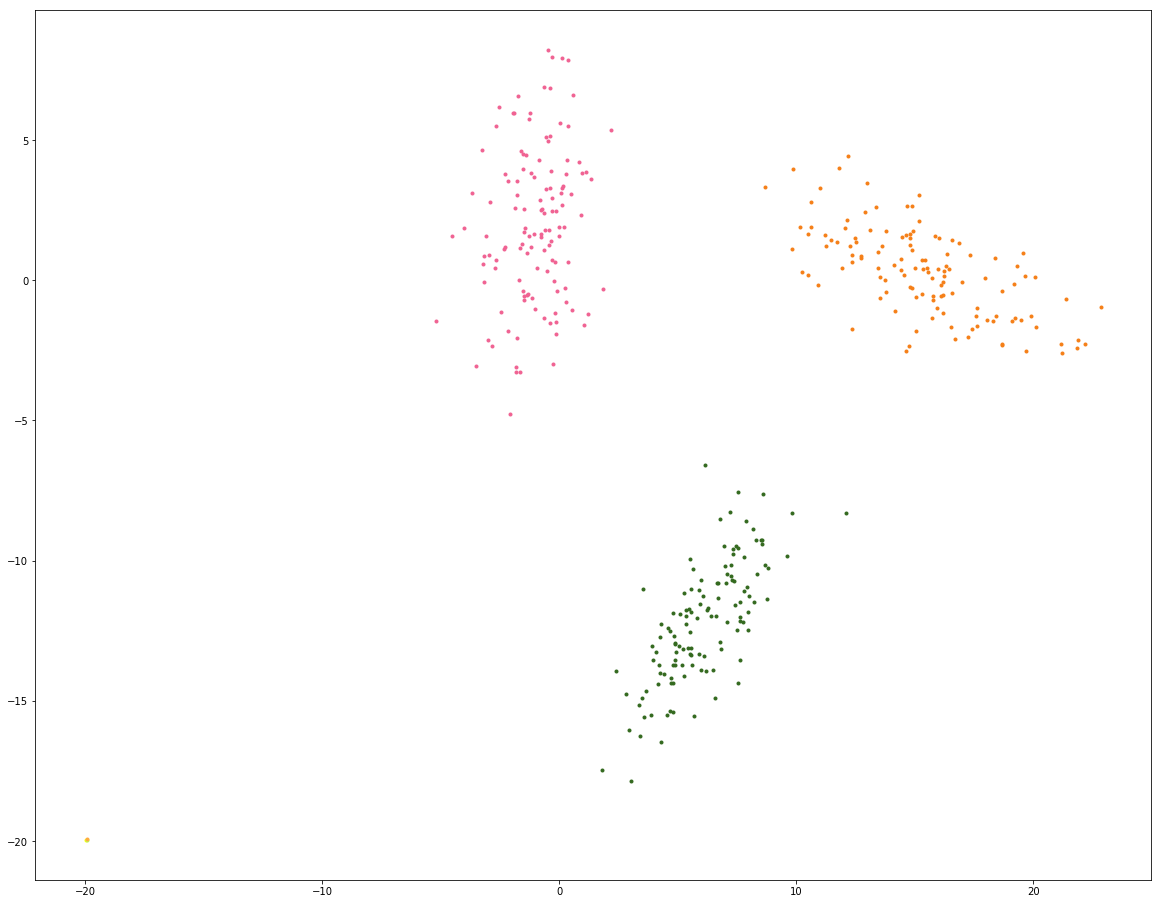

In [30]:
import matplotlib.mlab
"""
mt1 = min(test_data1,key=lambda item:item[1])
xt1 = max(test_data1,key=lambda item:item[1])
mt2 = min(test_data2,key=lambda item:item[1])
xt2 = max(test_data2,key=lambda item:item[1])
mt3 = min(test_data3,key=lambda item:item[1])
xt3 = max(test_data3,key=lambda item:item[1])"""
plt.rcParams['figure.figsize'] = [20, 16]
plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')
"""
plt.plot(mt1[0],mt1[1],"b",marker='o',linestyle='None')
plt.plot(mt2[0],mt2[1],"b",marker='o',linestyle='None')
plt.plot(mt3[0],mt3[1],"b",marker='o',linestyle='None')
plt.plot(xt1[0],xt1[1],"b",marker='o',linestyle='None')
plt.plot(xt2[0],xt2[1],"b",marker='o',linestyle='None')
plt.plot(xt3[0],xt3[1],"b",marker='o',linestyle='None')"""
X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# print Y
plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')
X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')
X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
plt.plot(X,Y,c=c2[3],marker='.',linestyle='None')



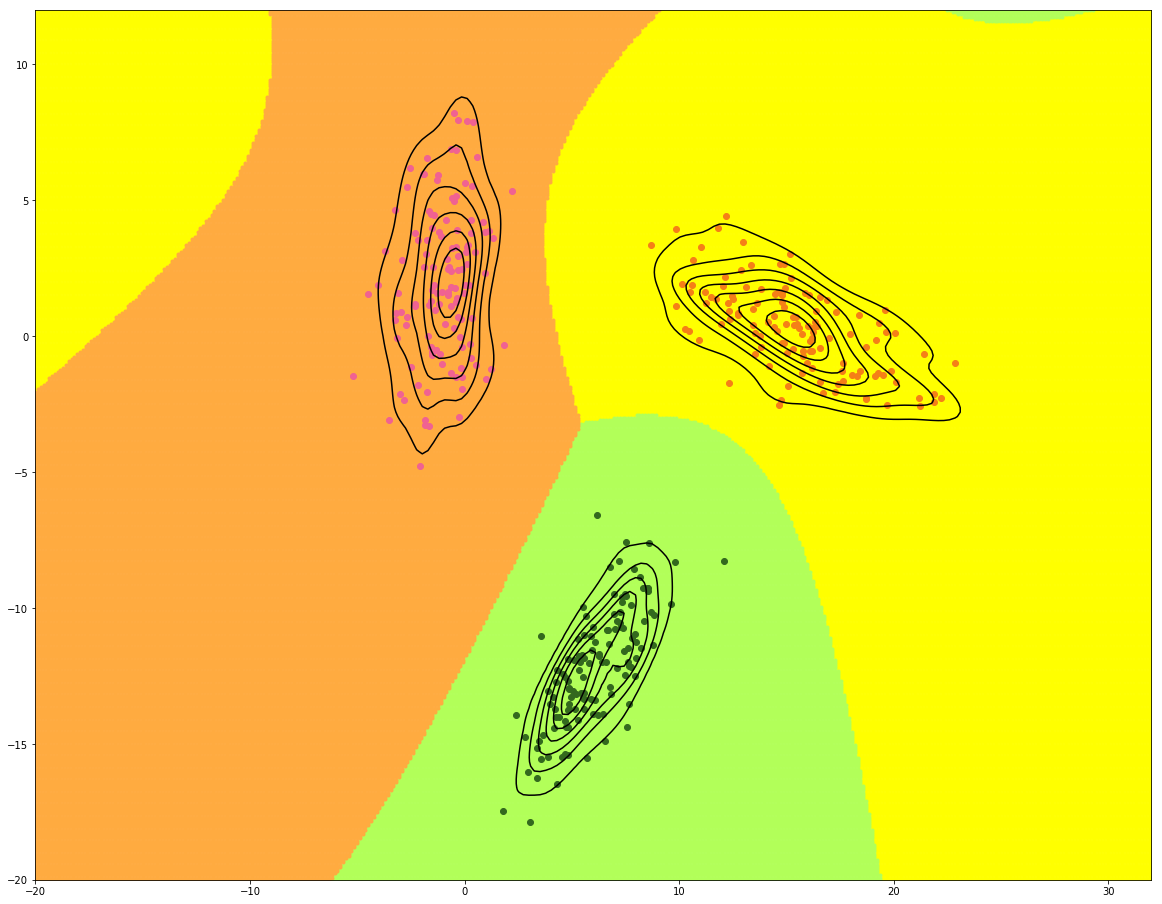

In [20]:
from scipy.stats import kde
nbins = 200
data = np.asarray(test_data1)
X, Y = data.T
kala = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[-20:32:nbins*1j,-20:12:nbins*1j]
zi = kala(np.vstack([xi.flatten(), yi.flatten()]))
plt.plot(x[1],y[1],c[1],marker='.',linestyle='None',zorder=1)
plt.plot(X, Y, 'o',zorder=5, color=c2[1])
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black',zorder=10)

data = np.asarray(test_data2)
X, Y = data.T
kala = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[-20:32:nbins*1j,-20:12:nbins*1j]
zi = kala(np.vstack([xi.flatten(), yi.flatten()]))
plt.plot(x[2],y[2],c[2],marker='.',linestyle='None',zorder=1)
plt.plot(X, Y, 'o',zorder=5, color=c2[2])
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black',zorder=10)

data = np.asarray(test_data3)
X, Y = data.T
kala = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[-20:32:nbins*1j,-20:12:nbins*1j]
zi = kala(np.vstack([xi.flatten(), yi.flatten()]))
plt.plot(x[3],y[3],c[3],marker='.',linestyle='None',zorder=1)
plt.plot(X, Y, 'o',zorder=5, color=c2[3])
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black',zorder=10)

160000 160000
160000


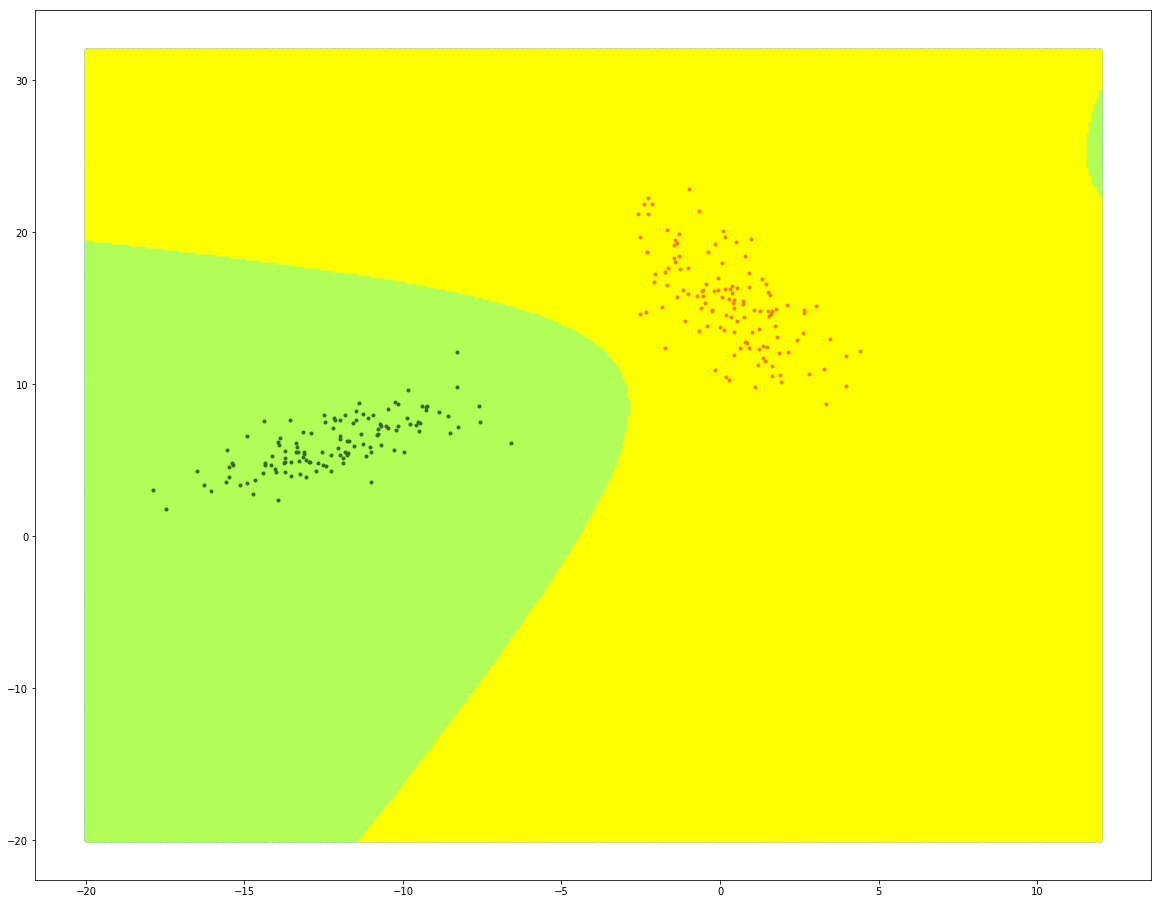

In [12]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)
xi = np.linspace(-20,32,400)
yi = np.linspace(-20,12,400)
XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
plt.plot(YY,XX,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res2[i]>temp):
            val=2
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
plt.rcParams['figure.figsize'] = [20, 16]
plt.plot(y[1],x[1],c[1],marker='.',linestyle='None')
plt.plot(y[2],x[2],c[2],marker='.',linestyle='None')
# plt.plot(y[3],x[3],'.',c[3])
X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# print Y
plt.plot(Y,X,c=c2[1],marker='.',linestyle='None')
X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
plt.plot(Y,X,c=c2[2],marker='.',linestyle='None')

# X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
# Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
# plt.plot(Y,X,'.','g')

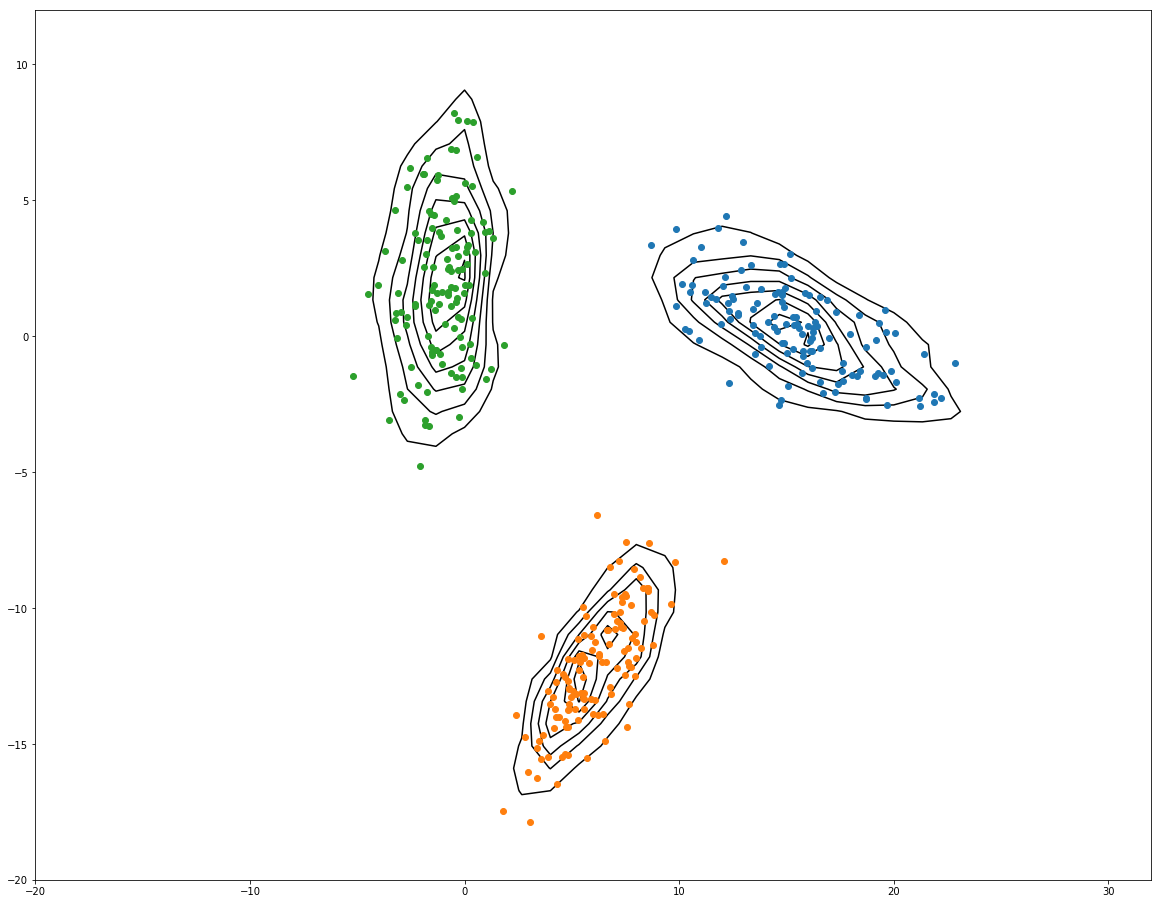

In [13]:
from scipy.stats import kde
nbins = 40
data = np.asarray(test_data1)
X, Y = data.T
kala = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[-20:32:nbins*1j,-20:12:nbins*1j]
zi = kala(np.vstack([xi.flatten(), yi.flatten()]))
plt.plot(X, Y, 'o')
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black')

data = np.asarray(test_data2)
X, Y = data.T
kala = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[-20:32:nbins*1j,-20:12:nbins*1j]
zi = kala(np.vstack([xi.flatten(), yi.flatten()]))
plt.plot(X, Y, 'o')
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black')

data = np.asarray(test_data3)
X, Y = data.T
kala = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[-20:32:nbins*1j,-20:12:nbins*1j]
zi = kala(np.vstack([xi.flatten(), yi.flatten()]))
plt.plot(X, Y, 'o')
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black')

160000 160000
160000


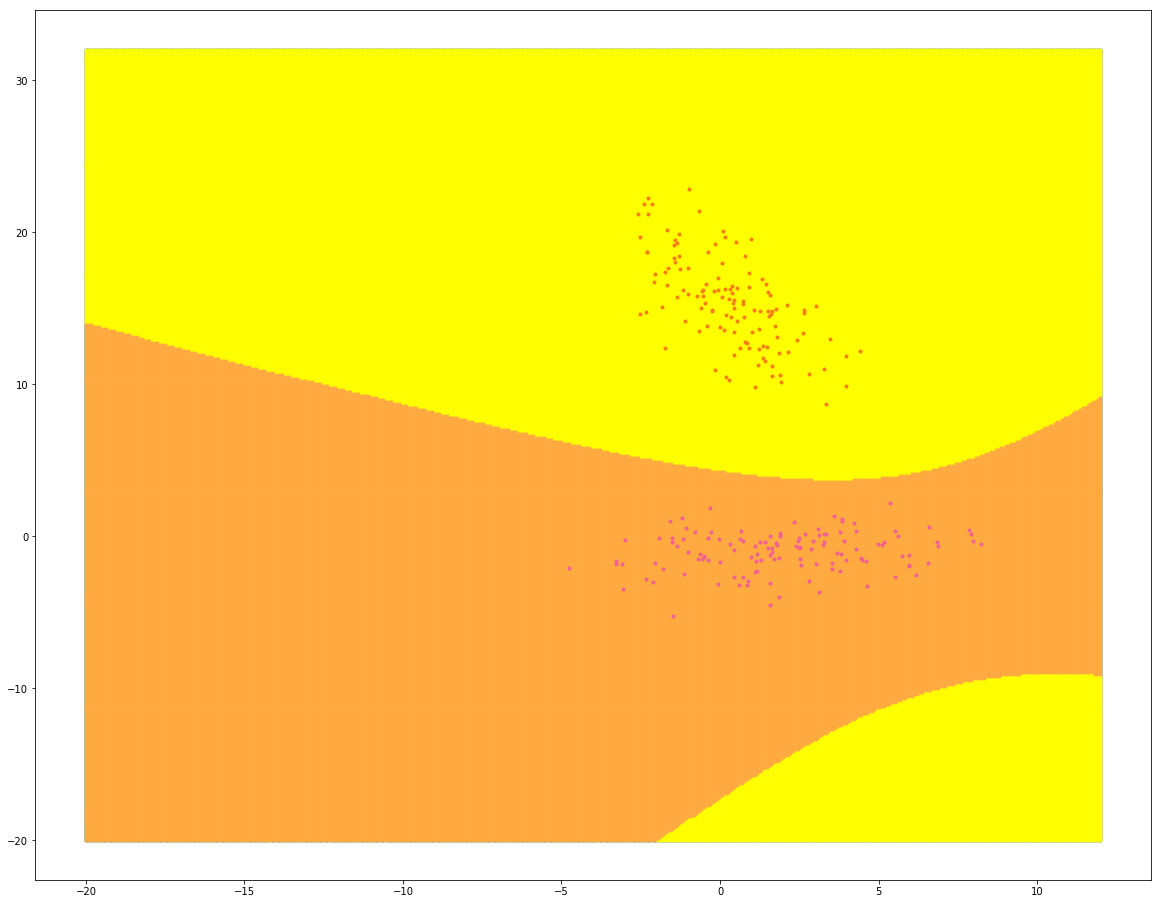

In [14]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
plt.plot(YY,XX,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=1
        temp=res1[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
plt.rcParams['figure.figsize'] = [20, 16]
plt.plot(y[1],x[1],c[1],marker='.',linestyle='None')
# plt.plot(y[2],x[2],'.',c[2])
plt.plot(y[3],x[3],c[3],marker='.',linestyle='None')
X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# print Y
plt.plot(Y,X,c=c2[1],marker='.',linestyle='None')
# X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
# Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
# plt.plot(Y,X,'.','r')
X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
plt.plot(Y,X,c=c2[3],marker='.',linestyle='None')


160000 160000
160000


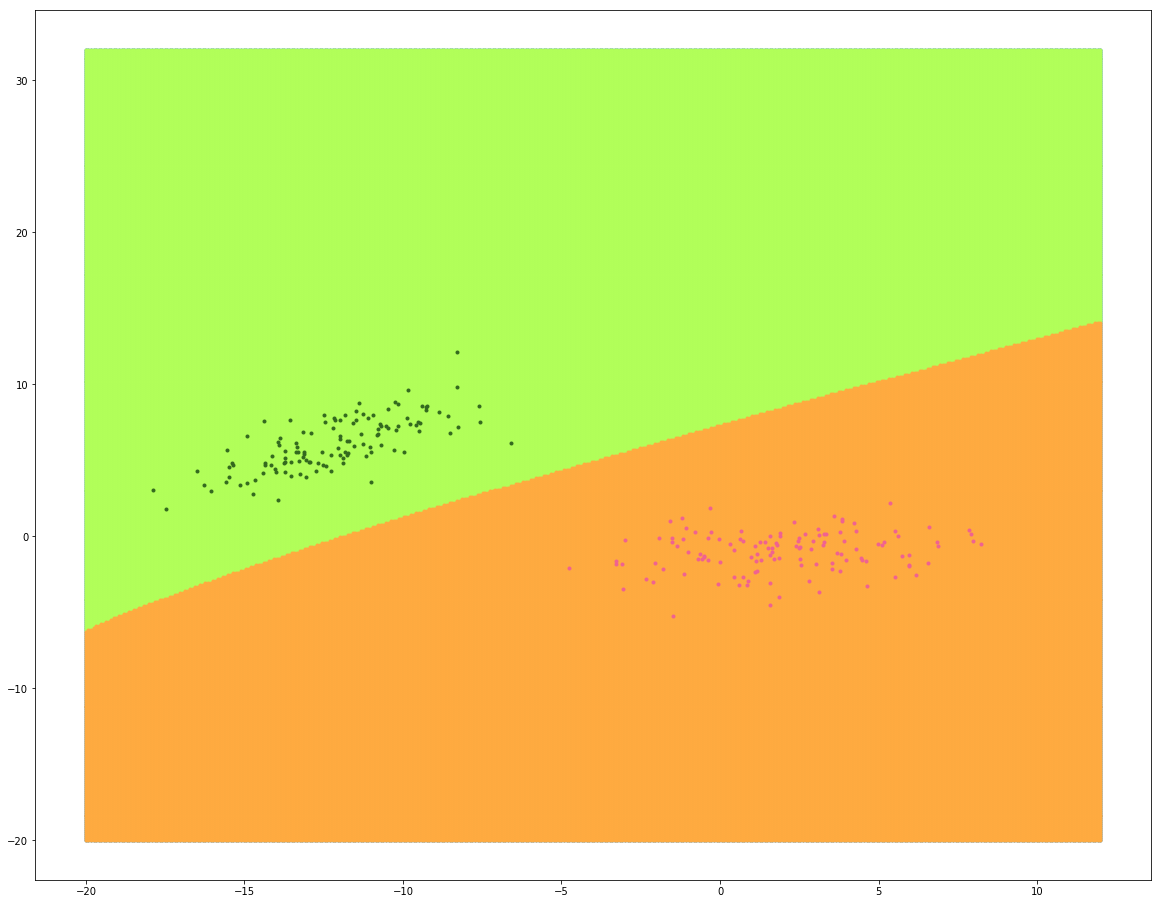

In [15]:
import numpy as np

X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

# plt.plot(Y,X,'.')
plt.plot(YY,XX,'.')
print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
# print XX, YY, XY
test_data_name = XY
res1=g_c1(test_data_name)
res2=g_c2(test_data_name)
res3=g_c3(test_data_name)

x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(res1)):
#         print res1[i],res2[i],res3[i]
        val=2
        temp=res2[i]
        if(res3[i]>temp):
            val=3
        ans.append(val)
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()
plt.rcParams['figure.figsize'] = [20, 16]
# plt.plot(y[1],x[1],'.',c[1])
plt.plot(y[2],x[2],c[2],marker='.',linestyle='None')
# plt.plot(y[2],x[2],'.',c[2])
plt.plot(y[3],x[3],c[3],marker='.',linestyle='None')
# X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
# Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
# # print Y
# plt.plot(Y,X,'.')
X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
plt.plot(Y,X,c=c2[2],marker='.',linestyle='None')
X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
plt.plot(Y,X,c=c2[3],marker='.',linestyle='None')